# **Exploring Best sellers with categories Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = 'bestsellers with categories.csv'
df = pd.read_csv(path)

def rating_category(n):
    if n >= 4.0:
        return '4.0+'
    else:
        return 'Below 4.0'
    
df['rating_category'] = df['User Rating'].apply(rating_category)
df

,Name,Author,User Rating,Reviews,Price,Year,Genre,rating_category
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,4.0+
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,4.0+
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,4.0+
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,4.0+
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,4.0+
...,...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,4.0+
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction,4.0+
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction,4.0+
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction,4.0+


## Most books Authors wrote

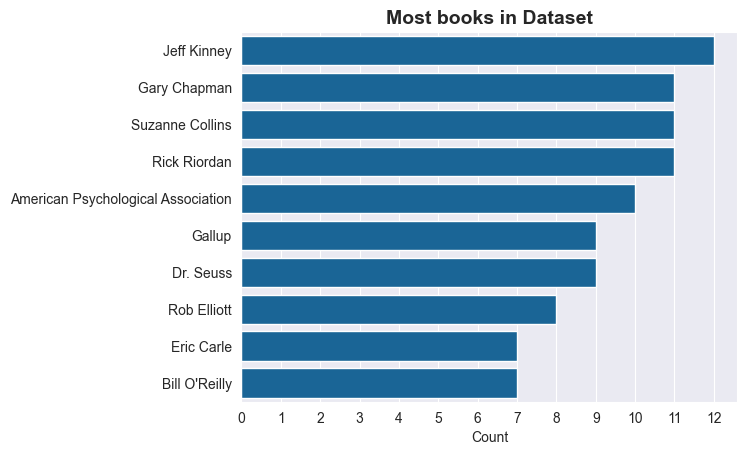

In [2]:
sns.set_style("darkgrid")

authors_no_of_books = df.pivot_table('Name', 'Author', aggfunc= len).sort_values('Name', ascending=False).head(10)

#Plotting
g = sns.barplot(x= 'Name', y = authors_no_of_books.index, data = authors_no_of_books, color = '#0569ab')
g.set(xlabel = 'Count', ylabel = None)
plt.title('Most books in Dataset', fontsize =  14, weight = 'bold')
plt.xticks(range(0, 13, 1))
plt.show()

## Which authors have books 4.0+ rated

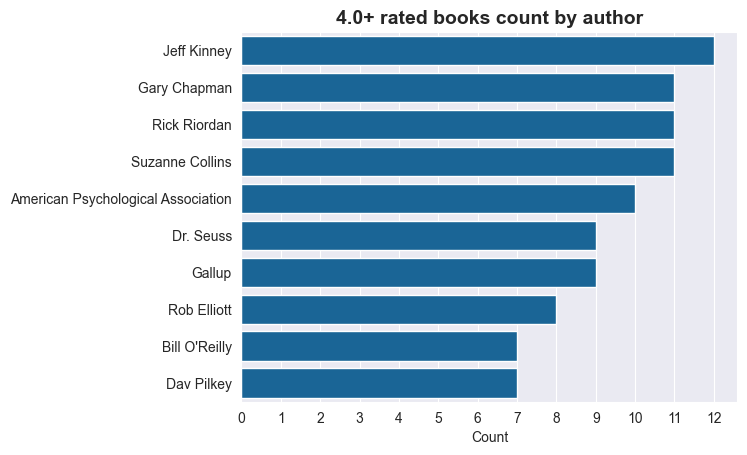

In [9]:
writer_rating = df.pivot_table('User Rating', 'Author', 'rating_category' , aggfunc= len).sort_values(['4.0+', 'Below 4.0'], ascending = False).head(10)
g = sns.barplot(x = '4.0+', y = writer_rating.index, data = writer_rating, color= '#0569ab')
g.set(xlabel = 'Count', ylabel = None)
plt.title('4.0+ rated books count by author', fontsize =  14, weight = 'bold')
plt.xticks(range(0, 13, 1))
plt.show()

## How many books have ratings above 4.0+ and which aren't?

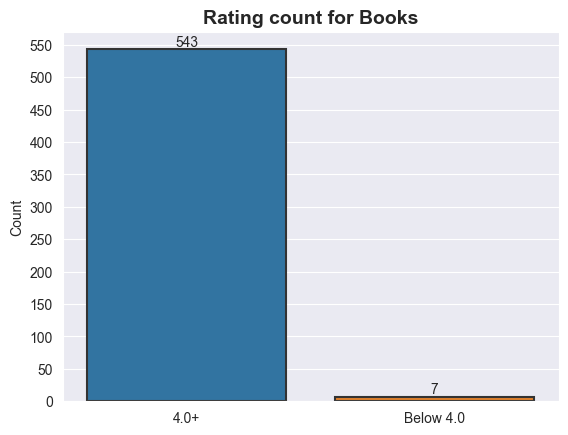

In [10]:
df['rating_category'] = df['User Rating'].apply(rating_category)
ratings_cat = df.pivot_table('User Rating', 'rating_category', aggfunc= len)
g = sns.barplot(x=ratings_cat.index, y = 'User Rating', data = ratings_cat, linewidth = 1.5, edgecolor = ".2")
g.bar_label(g.containers[0])
g.set(xlabel = None, ylabel = 'Count')
plt.title('Rating count for Books', fontsize =  14, weight = 'bold')
plt.yticks(range(0, 600, 50))
plt.show()

## By Year Distribution of Authors by Genre

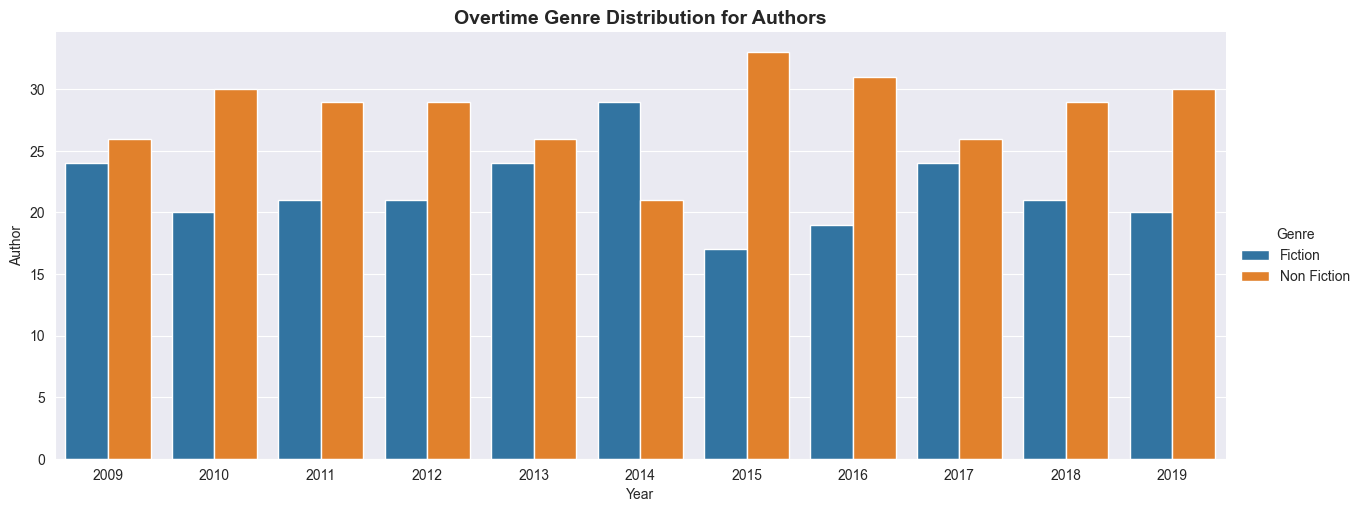

In [17]:
year_genre_type = df.pivot_table('Author', ['Year', 'Genre'], aggfunc= len).reset_index()
g = sns.catplot(data = year_genre_type, x = 'Year', y = 'Author', hue = 'Genre', kind = 'bar', aspect = 2.5)
plt.title('Overtime Genre Distribution for Authors', fontsize =  14, weight = 'bold')
plt.show()

## Genre with more than 4.0+ Rating

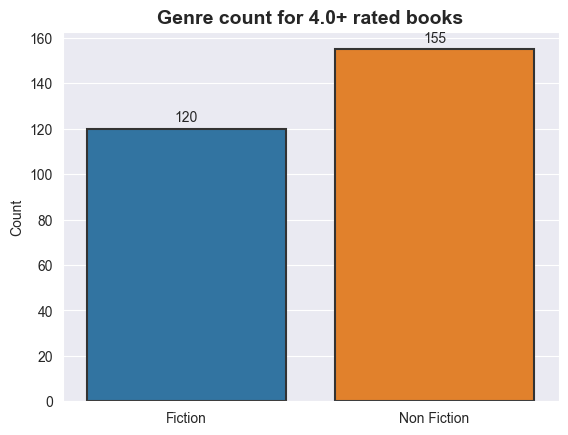

In [15]:
genre_rating = df.pivot_table('User Rating', 'rating_category', 'Genre' , aggfunc= len).fillna(0)
g = sns.barplot(data = genre_rating, ci = None, linewidth = 1.5, edgecolor = ".2")
g.bar_label(g.containers[0], padding = 3)
g.set(xlabel = None, ylabel = 'Count')
plt.title('Genre count for 4.0+ rated books', fontsize =  14, weight = 'bold')
plt.yticks(range(0, 165, 20))
plt.show()

# Data by Author name

In [7]:
#You can add any Author name present in dataset and get all data related to that author only
author = "Jeff Kinney"
author_data = df.query(f'Author == "{author}"')
author_data

,Name,Author,User Rating,Reviews,Price,Year,Genre,rating_category
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction,4.0+
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction,4.0+
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction,4.0+
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction,4.0+
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction,4.0+
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction,4.0+
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction,4.0+
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction,4.0+
435,The Meltdown (Diary of a Wimpy Kid Book 13),Jeff Kinney,4.8,5898,8,2018,Fiction,4.0+
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction,4.0+


## Plot of authors data

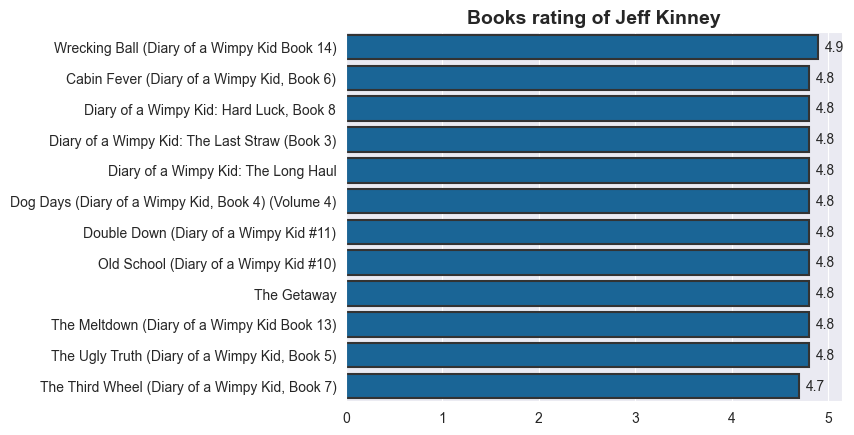

In [14]:
#Books ratings
sorted_by_rated = author_data.sort_values('User Rating', ascending= False)
g = sns.barplot(x = 'User Rating', y = 'Name', data = sorted_by_rated, color = '#0569ab', linewidth = 1.5, edgecolor = ".2")
g.set(xlabel = None, ylabel = None)
g.bar_label(g.containers[0], padding = 5)
plt.xticks((range(0, 6, 1)))
plt.title(f'Books rating of {author}', fontsize =  14, weight = 'bold')
plt.show()